In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('droppednulls.xlsx')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [4]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process')

In [13]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process']
            
pivot_df_avgliteracy = df.pivot_table(values=averages, index=['Country','ASBH02A'], aggfunc='mean')
pivot_df_avgliteracy

informational_purpose_avg  interpreting_process_avg  \
Country     ASBH02A                                                        
Austria     No                      498.657408                497.365857   
            Yes                     533.604588                533.534905   
Egypt       No                      368.944815                376.185753   
            Yes                     385.238053                382.455807   
France      No                      491.164422                492.907004   
            Yes                     520.421201                518.050071   
Germany     No                      493.821976                491.637327   
            Yes                     543.667811                543.658520   
Iran        No                      415.629239                418.139679   
            Yes                     421.840284                420.598873   
Jordan      No                      384.671082                377.712246   
            Yes                     371.996404                366.931226   
Netherlands No                      534.779113                527.015559   
            Yes                     546.509569                545.771857   
Sweden      No                      513.800935                509.636203   
            Yes                     564.668847                563.305228   
Turkey      No                      459.545292                450.463128   
            Yes                     508.299876                504.960550   

                     literary_purpose_avg  reading_avg  \
Country     ASBH02A                                      
Austria     No                 503.520940   501.137730   
            Yes                538.353546   535.753998   
Egypt       No                 370.055159   368.778085   
            Yes                374.382017   381.017793   
France      No                 494.816631   495.189771   
            Yes                524.127303   522.368422   
Germany     No                 503.782080   496.504230   
            Yes                551.219226   545.941246   
Iran        No                 435.488964   424.286114   
            Yes                422.984017   422.865906   
Jordan      No                 381.794478   383.291099   
            Yes                365.809400   368.777434   
Netherlands No                 527.257465   532.012580   
            Yes                544.596141   544.055471   
Sweden      No                 510.426070   513.532231   
            Yes                569.014791   565.399209   
Turkey      No                 456.161154   454.834990   
            Yes                505.637007   507.160195   

                     straightforward_process  
Country     ASBH02A                           
Austria     No                    503.331516  
            Yes                   538.541325  
Egypt       No                    364.934062  
            Yes                   378.604022  
France      No                    495.147998  
            Yes                   527.467670  
Germany     No                    496.581183  
            Yes                   546.973033  
Iran        No                    429.671741  
            Yes                   423.450890  
Jordan      No                    384.778212  
            Yes                   368.988134  
Netherlands No                    527.323949  
            Yes                   544.427139  
Sweden      No                    515.623797  
            Yes                   568.000974  
Turkey      No                    459.409544  
            Yes                   509.904656

In [17]:
pivot_df_avgliteracy.reset_index(inplace=True)

# Reshape the data for plotting
melted_df = pivot_df_avgliteracy.melt(id_vars=['Country', 'ASBH02A'], value_vars=averages, var_name='Literacy_Element', value_name='Average')

# Create a combined column for Country and Literacy Element
melted_df['Country_Literacy'] = melted_df['Country'] + '_' + melted_df['Literacy_Element']

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=melted_df, x='Country_Literacy', y='Average', hue='ASBH02A', palette='pastel', ci=None)
plt.title('Average Literacy Scores by Country and Literacy Element')
plt.ylabel('Average Score')
plt.xlabel('Country and Literacy Element')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.legend(title='ASBH02A', loc='upper right')
plt.show()

ValueError: cannot insert level_0, already exists

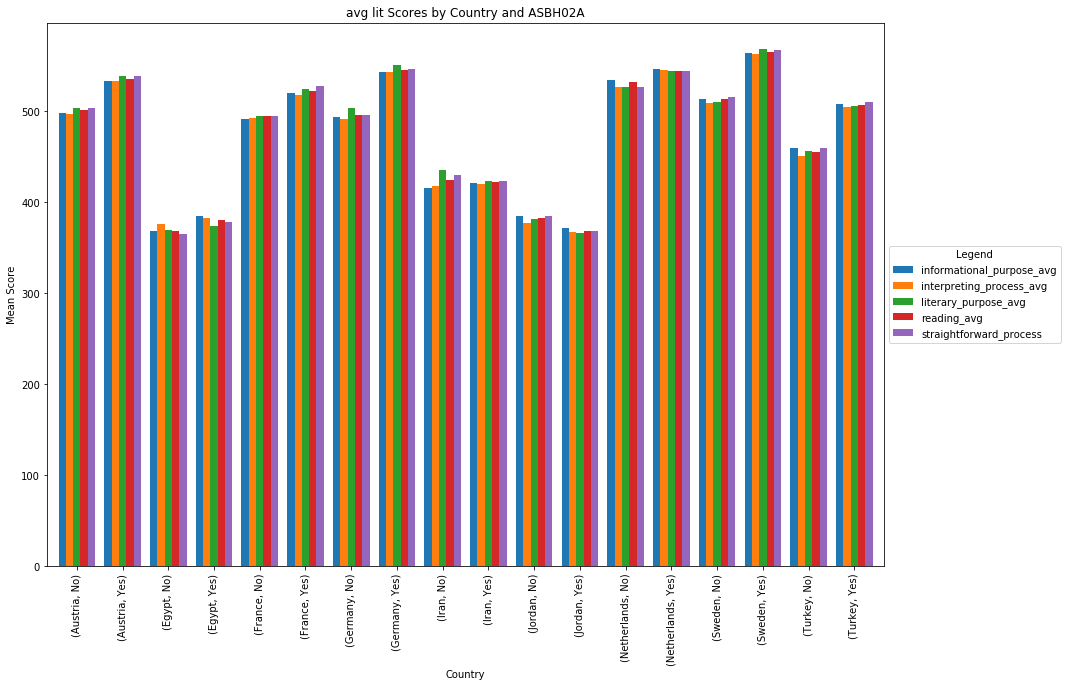

In [7]:
ax7 = pivot_df_avgliteracy.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax7.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

---------------------------------------

## Unstacked pivot below

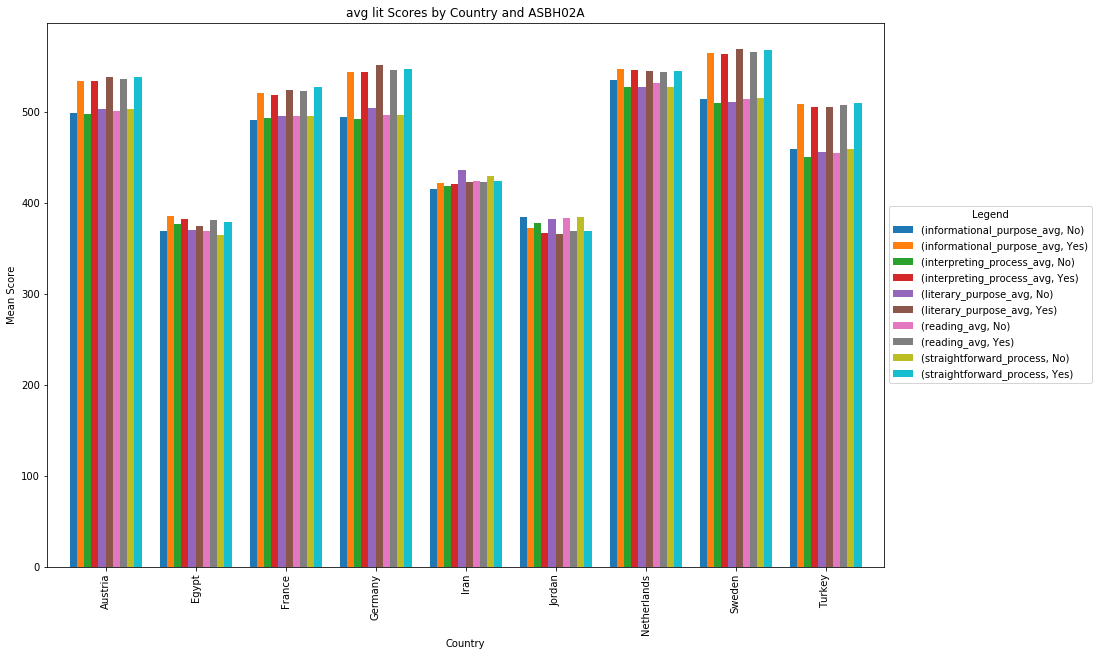

In [8]:
pivot_df_avgliteracy_unstacked = pivot_df_avgliteracy.unstack(level=1)
ax5 = pivot_df_avgliteracy_unstacked.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

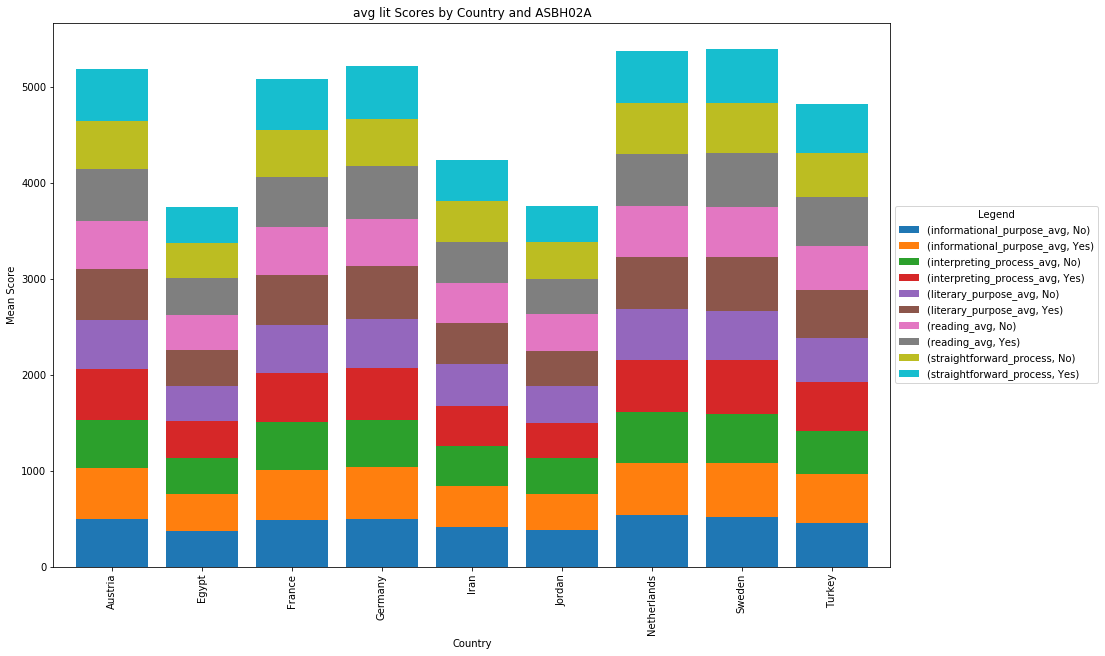

In [9]:
pivot_df_avgliteracy_unstacked = pivot_df_avgliteracy.unstack(level=1)
ax6 = pivot_df_avgliteracy_unstacked.plot(kind='bar', figsize=(15,10), width=0.8, stacked = True)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax6.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()